In [1]:
import os
import sys

current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, project_root)
os.chdir(project_root)

In [2]:
from utils.geometry_utils import create_square_polygon
from src.download_maps_images import MapboxStaticTiles
from config.config import DEFAULT_ZOOM  , gdf , image_width, image_height , model_rcnn_path , model_yolo
from utils.visualization_utils import generate_colored_masks, process_display_image 
from src.annotation_shapefile import convert_annotations_to_polygons , calculate_image_bounds 

import geopandas as gpd
import os
import logging

In [3]:
output_folder = "/Users/Hiba/satellite-imagery-pfe/data/feild_del"
image_path = "/Users/Hiba/satellite-imagery-pfe/data/feild_del/test_image.jpg"

### Detectron2 

2024-07-08 01:37:02,449 - INFO - [DetectionCheckpointer] Loading from /Users/Hiba/satellite-imagery-pfe/data/model_final.pth ...
2024-07-08 01:37:02,450 - INFO - [Checkpointer] Loading from /Users/Hiba/satellite-imagery-pfe/data/model_final.pth ...
/Users/Hiba/anaconda3/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Predicted annotation saved in '/Users/Hiba/satellite-imagery-pfe/data/feild_del/annotations.json'


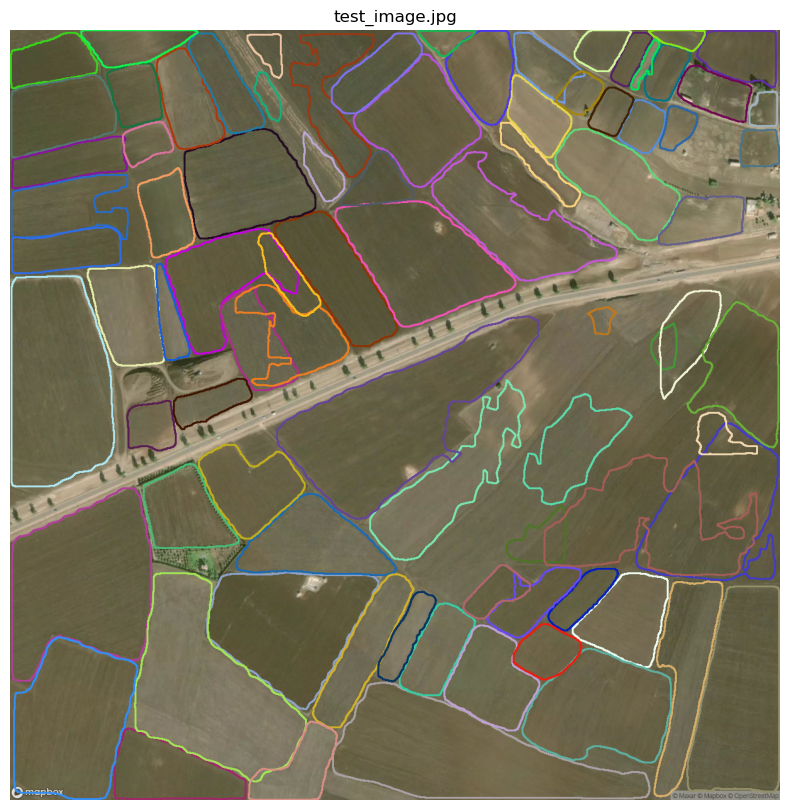

In [9]:
from src.inference import run_inference_detectronv2
run_inference_detectronv2(image_path, output_folder)

###  Mask RCNN

In [4]:
from src.inference import run_inference_mask_rcnn
from config.config  import model_rcnn_path
run_inference_mask_rcnn(image_path, output_folder,model_rcnn_path)

KeyError: 'instances'

## Yolov8

In [4]:
from src.inference import run_inference_yolo
run_inference_yolo(image_path, model_yolo)


image 1/1 /Users/Hiba/satellite-imagery-pfe/data/feild_del/test_image.jpg: 640x640 84 parcels, 760.7ms
Speed: 6.0ms preprocess, 760.7ms inference, 103.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /Users/Hiba/runs/segment/predict2
1 label saved to /Users/Hiba/runs/segment/predict2/labels


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src data type = 19 is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'


<Figure size 1200x800 with 0 Axes>